# Supervised Learning

## Regression formulas

In [1]:
import numpy as np
import pandas as pd
import math

In [2]:
# plotting
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


### Generate linear data points

A function that generates data points according to the equation (r = mx + b + noise) where m=2.25, b = 6, and noise$\sim N(0,1.21)$

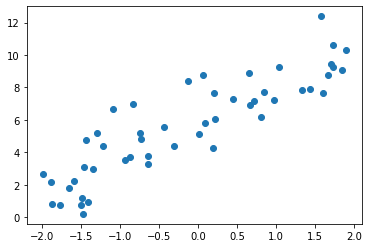

In [3]:
n_points = 50

b = 6 # intercept
m = 2.25 # slope
noise_mean = 0.0
noise_var = 1.21

X = []
r = []
for i in range(n_points):
    rnd_num = np.random.uniform(-2, 2)
    X.append(rnd_num)
    r.append(b + m*rnd_num + np.random.normal(loc=noise_mean, scale=noise_var))

plt.scatter(X, r, marker='o');

### Calculate $w_0$ and **$w_1$** values in linear regression equation $r = w_0+w_1*x$

In [4]:
def calculate_w0_w1(X , r):
    N = len(r)
    x_mean = np.mean(X)
    r_mean = np.mean(r)

    first_term = np.dot(X , r) - (x_mean * r_mean * N)

    second_term = sum([ i**2 for i in X]) - (N * math.pow(x_mean , 2))
    w1 = first_term / second_term
    w0 = r_mean - w1 * x_mean
    
    return np.round(w0,5) , np.round(w1,5)

In [5]:
def predict(X , w0 , w1):
    r = [ w1 * x + w0 for x in X]
    return r

### Root Mean Square Error (RMSE)

Given a set of actual labels (gLabels) and predicted labels (gPredictedLabels) and the function that returns RMSE

In [6]:
def getRMSE(gLabels, gPredictedLabels):
    N = len(gPredictedLabels)
    total = 0
    for i in range(N):
        total +=  math.pow((gPredictedLabels[i] - gLabels[i]) , 2)
    
    RMSE = math.sqrt(total) / N    
    return np.round(RMSE,3)

### Report the error with the calculated $w_1$ and $w_0$ by using RMSE

In [7]:
# Report the error with the calculated w_1 and w_0
w0, w1 = calculate_w0_w1(X , r)
predicted_r = predict(X, w0 , w1)
RMSE = getRMSE(r , predicted_r)

print("W0:{} ,W1:{}".format(w0, w1))
print("RMSE: " , RMSE)

W0:5.95123 ,W1:2.15804
RMSE:  0.198


### Plot the data points along with the fitted line.
Using mathplotlib library's plot function

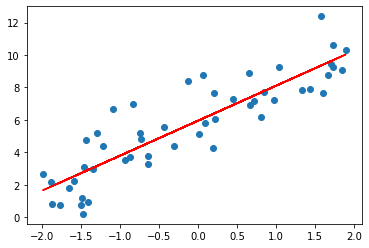

In [8]:
# Plot the data points along with the fitted line
plt.scatter(X,r)
plt.plot(X,predicted_r, c ='red' )
plt.show()